                                        Asssignment: Performing SVM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('C:\\Ankit_Singh\\Data Science\\Sample Data\\mushroom.csv')  

df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
# Now we will drop column Unnamed:0 because we do not know what that field is about
df.drop(columns=['Unnamed: 0'], inplace=True)


In [4]:
# There are many cateorical field so let's try to encode them for better result
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


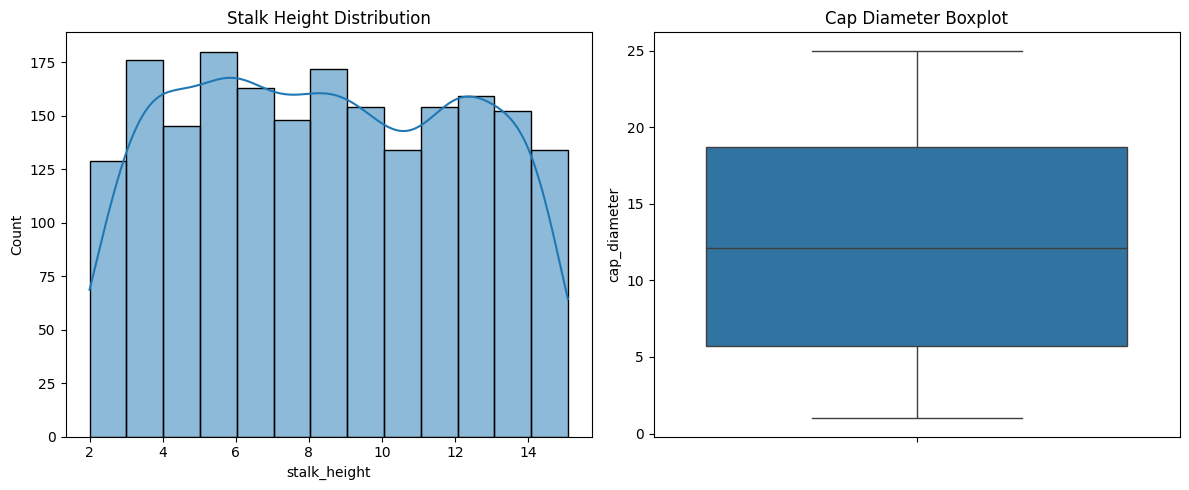

In [15]:
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['stalk_height'], kde=True, ax=axes[0])
axes[0].set_title("Stalk Height Distribution")
sns.boxplot(y='cap_diameter', data=df, ax=axes[1])
axes[1].set_title("Cap Diameter Boxplot")
plt.tight_layout()
plt.show()


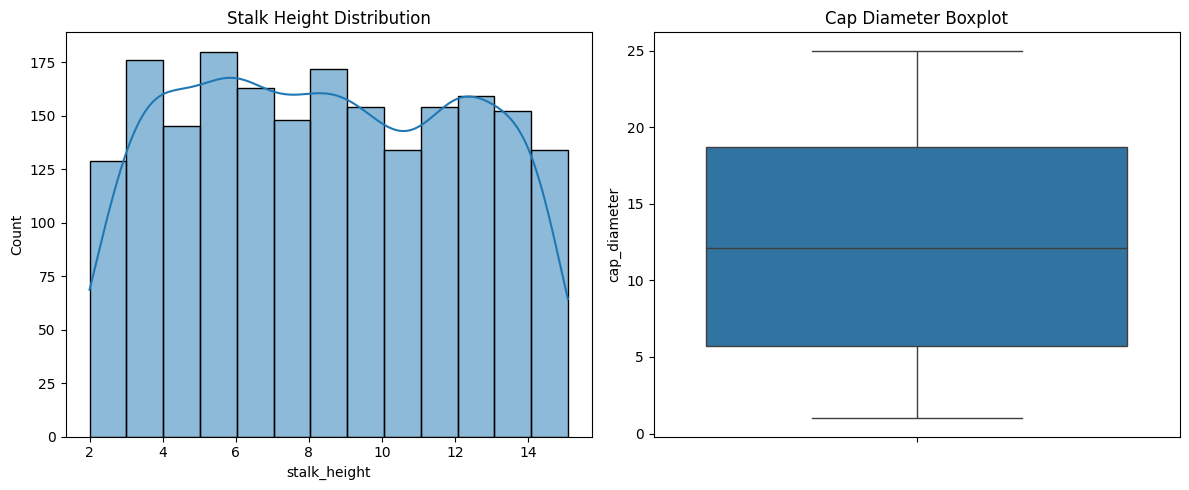

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(df['stalk_height'], kde=True, ax=axes[0])
axes[0].set_title("Stalk Height Distribution")

sns.boxplot(y='cap_diameter', data=df, ax=axes[1])
axes[1].set_title("Cap Diameter Boxplot")

plt.tight_layout()
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_4708\457730053.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Edible', 'Poisonous'])


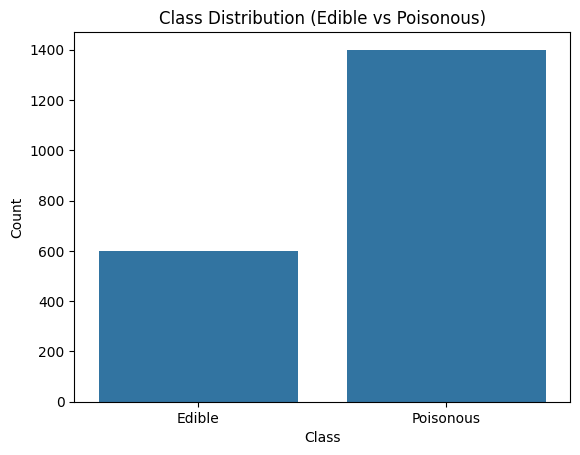

In [17]:
# Count plot for class distribution
ax = sns.countplot(x=df['class'])
plt.title("Class Distribution (Edible vs Poisonous)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_xticklabels(['Edible', 'Poisonous'])
plt.show()


In [ ]:
# Pairplot on a subset
sns.pairplot(df[['stalk_height', 'cap_diameter', 'class']], hue='class')
plt.show()


In [5]:
# Split data into features and target
X = df.drop('class', axis=1)
y = df['class']


In [6]:
# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize the features
scaler = StandardScaler()
X_train[['stalk_height', 'cap_diameter']] = scaler.fit_transform(X_train[['stalk_height', 'cap_diameter']])
X_test[['stalk_height', 'cap_diameter']] = scaler.transform(X_test[['stalk_height', 'cap_diameter']])


In [8]:
# Train a basic SVM model with class weight 'balanced' to handle class imbalance
svm_model = SVC(kernel='linear', C=1, class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


In [9]:
# Display classification report and confusion matrix
print("Initial SVM Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Initial SVM Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.50      0.42       133
           1       0.69      0.56      0.62       267

    accuracy                           0.54       400
   macro avg       0.53      0.53      0.52       400
weighted avg       0.58      0.54      0.55       400

Confusion Matrix:
 [[ 67  66]
 [118 149]]


In [10]:
# GridSearch for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [11]:
# Best parameters after GridSearch
print("Best Hyperparameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)



Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [12]:
# Classification report after tuning
print("\nTuned SVM Classification Report:")
print(classification_report(y_test, y_pred_best))



Tuned SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       133
           1       0.87      0.96      0.91       267

    accuracy                           0.88       400
   macro avg       0.89      0.84      0.86       400
weighted avg       0.88      0.88      0.88       400



In [13]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)


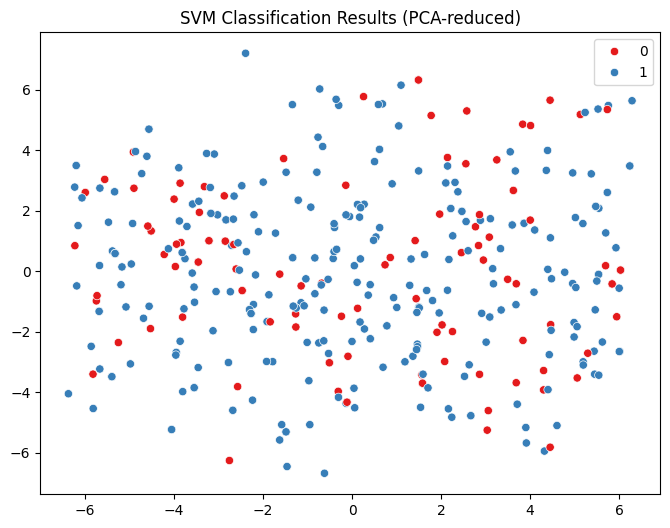

In [14]:
# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_best, palette='Set1')
plt.title("SVM Classification Results (PCA-reduced)")
plt.show()

# Observation:

(1).The dataset consisted of various categorical attributes describing mushroom characteristics, such as cap shape, color, odor, and gill features.
(2).The target variable was 'class', indicating whether a mushroom is edible (0) or poisonous (1).
(3).All features were label-encoded to convert categorical variables into numerical format for model training.
(4).The dataset was split into training and test sets (80/20) and standardized for relevant numerical features (stalk_height, cap_diameter) to improve SVM performance.
(5).Initial SVM attempts without tuning performed poorly due to class imbalance, predicting only the majority class.

After applying class_weight='balanced' and performing GridSearchCV for hyperparameter tuning (on kernel, C, and gamma), the final SVM model achieved:


Overall Accuracy: 88%

Macro Avg F1-Score: 0.86

Weighted Avg F1-Score: 0.88

Notably, the recall for poisonous mushrooms reached 96%, which is crucial from a public health and safety perspective.

Conclusion: The SVM model, after appropriate preprocessing and hyperparameter tuning, demonstrated strong predictive capability, especially in correctly identifying poisonous mushrooms.SVM with RBF kernel and class balancing proved effective for this classification task.




